In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split, KFold
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
x = pd.read_csv('C:\\Users\himab\Documents\spring2020\ML\hw2\hw2-data\Bayes_classifier\X.csv', header = None)
y = pd.read_csv('C:\\Users\himab\Documents\spring2020\ML\hw2\hw2-data\Bayes_classifier\Y.csv', header = None)

In [3]:
#train test splitting
x = np.array(x)
y = np.array(y)
X_train = {}
X_test = {}
y_train = {}
y_test = {}
i = 0
for train_index, test_index in KFold(n_splits=10, shuffle = True).split(x):
    X_train[i], X_test[i] = x[train_index], x[test_index]
    y_train[i], y_test[i] = y[train_index], y[test_index]
    i += 1

In [4]:
pi_val = {}
for index in range(len(y_train)):
    pi_val[index]=0
    for i in range(len(y_train[index])):
        pi_val[index] += y_train[index][i][0]
    pi_val[index] /= len(y_train[index])
pi_val
# pi = (pi_val/len(y_train_vals))                           


{0: 0.392512077294686,
 1: 0.3983091787439614,
 2: 0.39420289855072466,
 3: 0.3879227053140097,
 4: 0.39855072463768115,
 5: 0.39420289855072466,
 6: 0.3927536231884058,
 7: 0.3922705314009662,
 8: 0.39468599033816426,
 9: 0.3958937198067633}

In [5]:
lam0 = {}
lam1 = {}
for i in range(len(X_train)):
    l1 = {}
    l2 = {}
    x_vals = X_train[i]
    y_vals = y_train[i]
    for d in range(54):
        a = b= s0 = s1 = 0
        for j in range(len(x_vals)):
            if y_vals[j] == 0:
                s0 += x_vals[j][d]
                a += 1
            else:
                s1 += x[j][d]
                b += 1
        l1[d] = (1+s0)/(1+a)
        l2[d] = (1+s1)/(1+b)
        lam0[i]=l1
        lam1[i]=l2
        

In [6]:
from scipy.special import factorial
import math
u=v=w=z=0
values = pd.DataFrame()
y_new_dict = {}
for i in range(len(X_test)):
    l = {}
    exp_0 = pow(pi_val[i],0)*pow(1-pi_val[i],1)
    exp_1 = pow(pi_val[i],1)*pow(1-pi_val[i],0)
    for j in range(len(X_test[i])):
        val0=val1=1
        for d in range(54):
            val0 = val0*(pow(lam0[i][d],X_test[i][j][d])*math.exp(-lam0[i][d]))/factorial(X_test[i][j][d])
            val1 = val1*(pow(lam1[i][d],X_test[i][j][d])*math.exp(-lam1[i][d]))/factorial(X_test[i][j][d])
        y_0 = exp_0*val0
        y_1 = exp_1*val1
        if(y_1>y_0):
            y = 1
        else:
            y = 0
        l[j]=y
        y_new_dict[i] = l
        if(y_new_dict[i][j] == 0):
            if(y_test[i][j] == 0):
                u += 1
            else:
                v += 1
        else:
            if(y_test[i][j] == 0):
                w += 1
            else:
                z += 1
                
values['0']=[u,v]
values['1']=[w,z]
print(values)
print((values['0'][0]+values['1'][1])/4600)
            
    
    

C:\Users\himab\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
C:\Users\himab\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]


      0     1
0  2315   472
1   112  1701
0.8730434782608696


In [7]:
#b
list_0 = {}
list_1 = {}
for d in range(54):
    s_0 = 0
    s_1 = 0
    for i in range(len(X_train)):
        s_0 += lam0[i][d]
        s_1 += lam1[i][d]
    list_0[d] = s_0/10
    list_1[d] = s_1/10
    

<function matplotlib.pyplot.show(*args, **kw)>

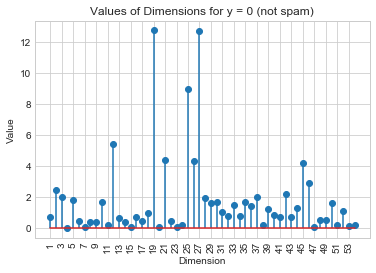

In [25]:
x_list = []
y_list = []
for i,j in list_0.items():
    x_list.append(i+1)
    y_list.append(j)
plt.style.use('seaborn-whitegrid')
plt.stem(x_list, y_list, use_line_collection = True)
plt.xticks(np.arange(min(x_list), max(x_list)+1, 2.0), rotation = 90)
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.title('Values of Dimensions for y = 0 (not spam)')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

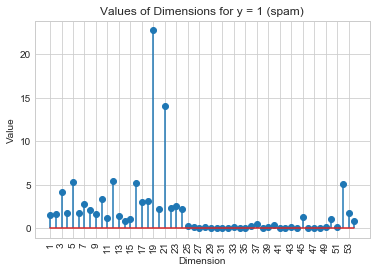

In [26]:
x_list1 = []
y_list1 = []
for i,j in list_1.items():
    x_list1.append(i+1)
    y_list1.append(j)
plt.style.use('seaborn-whitegrid')
plt.stem(x_list1, y_list1, use_line_collection = True)
plt.xticks(np.arange(min(x_list1), max(x_list1)+1, 2.0), rotation = 90)
plt.xlabel('Dimension')
plt.ylabel('Value')
plt.title('Values of Dimensions for y = 1 (spam)')
plt.show